# Разработка модели прогнозирования выбора образовательных курсов пользователями

## Загрузим нужные библиотеки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [ ]:
df.head(5)

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,15182,32.0,9/30/2020,6694527,1469,8/26/2020,163.0,0.0,1.0,0.0,...,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,0
1,89385,NaN,6/30/2021,6712877,1392,8/5/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,47931,NaN,2/28/2021,6659444,376,6/20/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,279085,1.0,11/30/2021,7151591,1160,4/14/2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7806,30.0,10/31/2020,6705666,952,7/19/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0


In [ ]:
df.shape

(200000, 59)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

In [ ]:
df.carts_created_at.value_counts()                   

12/30/2020    2940
8/24/2020     1806
8/27/2020     1770
12/31/2020    1738
8/31/2020     1724
              ... 
11/16/2021      28
6/8/2020        24
6/6/2020        22
6/9/2020        13
6/5/2020        13
Name: carts_created_at, Length: 447, dtype: int64

In [ ]:
df.communication_type.value_counts()                   

order    120786
web       49759
phone     28050
Name: communication_type, dtype: int64

Заменим все пропуски в данных

In [ ]:
df_train = df 
df = df.fillna(0)

Посмотрим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

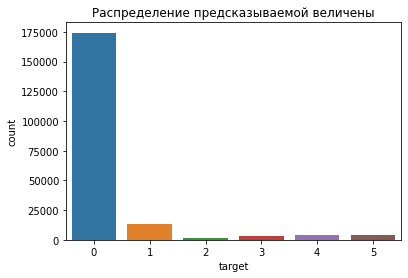

In [ ]:
sns.countplot(x = "target" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение возраста')

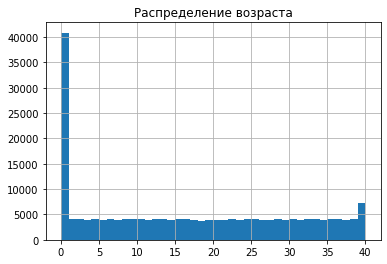

In [ ]:
df["age_indicator"].hist(bins = 40).set_title('Распределение возраста')

In [ ]:
max(df["age_indicator"])

40.0

Взглянем на несколько величин сразу

In [ ]:
df.columns

Index(['id', 'age_indicator', 'month_id', 'student_id', 'program_id',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'fee

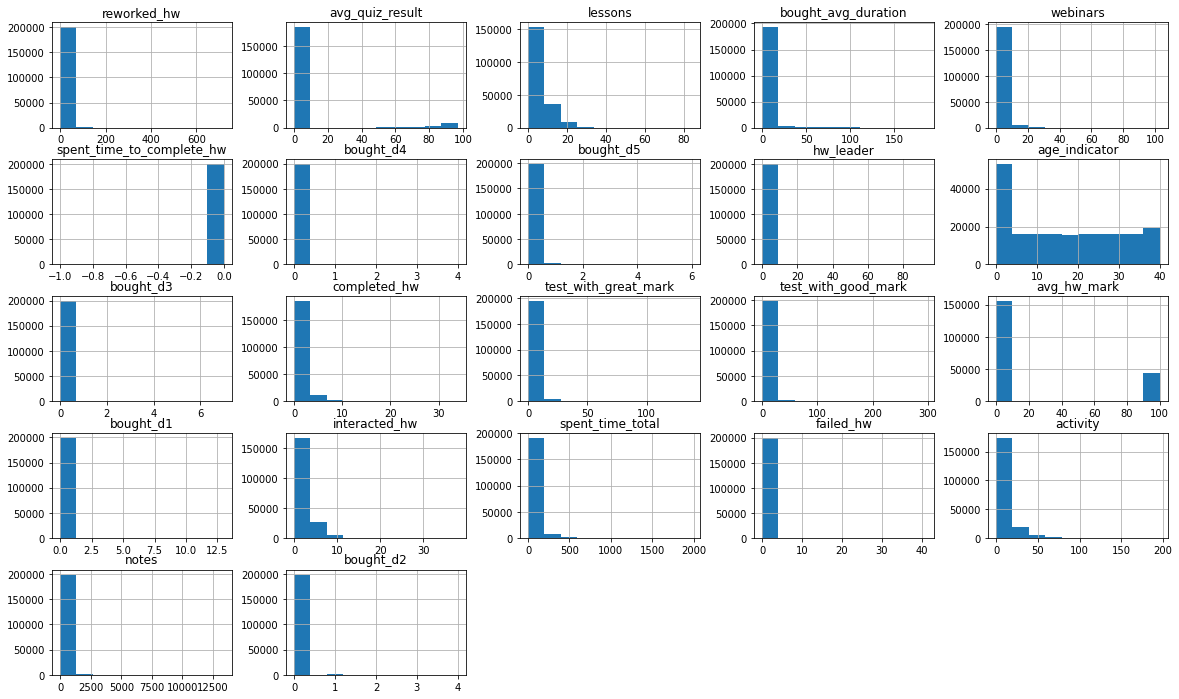

In [ ]:
features = list(set(['age_indicator',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration']))

_ = df[features].hist(figsize=(20,12))

Обратим внимание на часть столбцов с постоянными значениями

In [ ]:
df.spent_time_to_complete_hw.value_counts()

 0.0    199999
-1.0         1
Name: spent_time_to_complete_hw, dtype: int64

In [ ]:
df.bought_d4.value_counts()

0    198694
1      1262
3        40
4         4
Name: bought_d4, dtype: int64

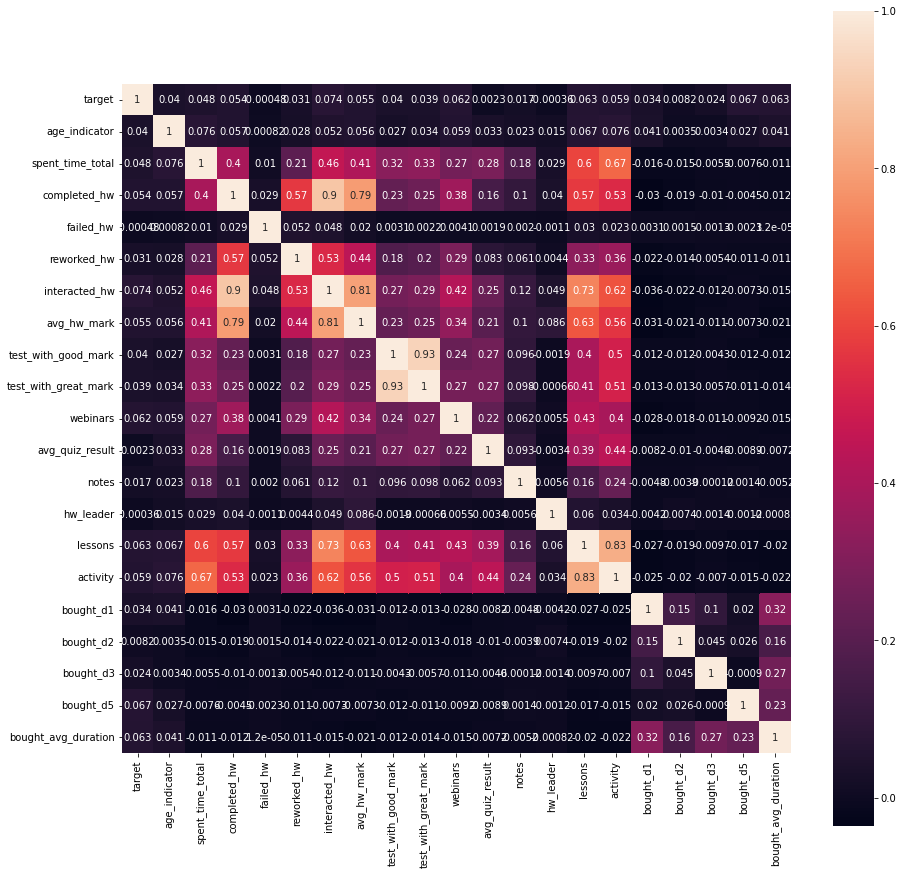

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

df_corr = df[["target",'age_indicator',
       'carts_created_at', 'spent_time_total',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3',
       'bought_d5', 'bought_avg_duration']]

g = sns.heatmap(df_corr.corr(), square = True, annot=True)

## Выделим выборки

In [ ]:
df.dtypes[df.dtypes == "object"].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')],
      dtype=object)

Поместим все столбцы object в массив, для их дальнейшего удаления

In [ ]:
mass_object = df.dtypes[df.dtypes == "object"].index.values

In [ ]:
mass_object = np.append(mass_object, "target")

In [ ]:
X = df.drop(mass_object, axis = 1)
y = df[["target"]]

In [ ]:
X.shape

(200000, 48)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [ ]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=0)

## Оценка точности

In [ ]:
pred = clf.predict(X_test)

In [ ]:
y_test.head(3)

,target
119737,0
72272,0
158154,0


In [ ]:
0.2* recall_score(y_test, pred, average='macro') + 0.8* precision_score(y_test, pred, average='macro')

0.7417353667606018

In [ ]:
df2 = pd.read_csv("/content/test_dataset_test.csv")

In [ ]:
df2.head(3)

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5
0,77551,NaN,5/31/2021,7064806,1395,2/28/2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,227812,27.0,5/31/2021,6982061,245,1/1/2021,81.0,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103035,9.0,6/30/2021,7118790,1233,3/19/2021,49.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [ ]:
df2_test = df2
df2 = df2.fillna(0)

In [ ]:
df2

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5
0,77551,0.0,5/31/2021,7064806,1395,2/28/2021,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,227812,27.0,5/31/2021,6982061,245,1/1/2021,81.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103035,9.0,6/30/2021,7118790,1233,3/19/2021,49.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,260943,0.0,9/30/2021,7288419,784,6/29/2021,10.0,0.0,0.0,0.0,...,0.0,2.0,2.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0
4,134611,7.0,8/31/2021,6949976,998,12/31/2020,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84992,186427,15.0,10/31/2021,6841719,73,10/19/2021,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
84993,197918,27.0,11/30/2021,6469768,885,11/7/2021,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
84994,174961,37.0,10/31/2021,7328822,1126,7/5/2021,0.0,0.0,1.0,0.0,...,0.0,3.0,3.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0
84995,182226,14.0,11/30/2021,5255473,1495,2/13/2021,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2.dtypes[df2.dtypes == "object"].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')],
      dtype=object)

In [ ]:
mass_object2 = df2.dtypes[df2.dtypes == "object"].index.values

In [ ]:
mass_object2

array(['month_id', 'carts_created_at', 'promo', 'communication_type',
       'ABC', 'city', 'country', 'os', 'browser', 'platform'],
      dtype=object)

In [ ]:
X2 = df2.drop(mass_object2, axis = 1)

In [ ]:
pred2 = clf.predict(X2)

In [ ]:
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ypred = df2[["id"]]

In [ ]:
ypred['target'] = pred2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(ypred.shape)
filename = 'submission_forest.csv'
ypred.to_csv(filename,index=False)
print('Saved file: ' + filename)

(84997, 2)
Saved file: submission_forest.csv


## Анализ базового решения показал, что алгоритм "случайный лес" и из коробки дает уже приличные результаты. Чтобы прийти к этому выводу, были исследованы и другие алгоритмы, оптимизирован датасет (обработаны признаки типа "дата", категориальные признаки, созданы новые признаки на основе существующих), исследована модель после оптимизации гиперпараметров, обогащен датасет. Исследования показали, что оптимизация гиперпараметров дает результаты хуже, чем "случайный лес" из коробки на обогащенном датасете.

Обработаем колонки типа "дата"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              200000 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           200000 non-null  float64
 7   spent_time_to_complete_hw  200000 non-null  float64
 8   completed_hw               200000 non-null  float64
 9   failed_hw                  200000 non-null  float64
 10  reworked_hw                200000 non-null  float64
 11  interacted_hw              200000 non-null  float64
 12  avg_hw_mark                200000 non-null  float64
 13  test_with_good_mark        20

In [ ]:
df['month_id'] = pd.to_datetime(df['month_id']) # Преобразуем колонки с датами
df['carts_created_at'] = pd.to_datetime(df['carts_created_at']) # Преобразуем колонки с датами

In [ ]:
df['month_id_day'] = df['month_id'].dt.day
df['month_id_day'].value_counts()

31    107423
30     82465
28     10112
Name: month_id_day, dtype: int64

In [ ]:
df['month_id_month'] = df['month_id'].dt.month
df['month_id_month'].value_counts()

11    30298
10    26842
9     23967
8     20938
7     18076
6     15672
5     13807
4     12528
3     11353
2     10112
1      8815
12     7592
Name: month_id_month, dtype: int64

In [ ]:
df['month_id_year'] = df['month_id'].dt.year
df['month_id_year'].value_counts()

2021    172094
2020     27906
Name: month_id_year, dtype: int64

In [ ]:
df['carts_created_at_day'] = df['carts_created_at'].dt.day
df['carts_created_at_day'].value_counts()

30    9162
19    9134
18    7878
20    7783
16    7324
17    6947
11    6680
25    6663
29    6645
21    6597
14    6548
28    6533
23    6433
15    6420
12    6419
24    6385
13    6351
26    6348
10    6114
7     6091
27    6074
9     5948
3     5870
4     5839
8     5835
5     5823
6     5728
22    5442
31    5314
1     4934
2     4738
Name: carts_created_at_day, dtype: int64

In [ ]:
df['carts_created_at_month'] = df['carts_created_at'].dt.month
df['carts_created_at_month'].value_counts()

8     33371
6     23639
10    23637
12    19919
7     18085
9     17733
2     15142
4     12484
11    12336
1      9906
3      7985
5      5763
Name: carts_created_at_month, dtype: int64

Обработаем категориальные признаки

In [ ]:
df['carts_created_at_year'] = df['carts_created_at'].dt.year
df['carts_created_at_year'].value_counts()

2020    115965
2021     84035
Name: carts_created_at_year, dtype: int64

In [ ]:
df['promo'] = df['promo'].replace('+', 1)
df['promo'] = df['promo'].replace('-', 0)
df['promo'].value_counts()

0    138595
1     61405
Name: promo, dtype: int64

In [ ]:
df['communication_type'] = df['communication_type'].replace('order', 1)
df['communication_type'] = df['communication_type'].replace('web', 2)
df['communication_type'] = df['communication_type'].replace('phone', 3)
df['communication_type'].value_counts()

1    120786
2     49759
3     28050
0      1405
Name: communication_type, dtype: int64

In [ ]:
df['ABC'] = df['ABC'].replace('D', 1)
df['ABC'] = df['ABC'].replace('A', 2)
df['ABC'] = df['ABC'].replace('B', 3)
df['ABC'] = df['ABC'].replace('C', 4)
df['ABC'].value_counts()

1    100371
2     45884
3     42605
4     11140
Name: ABC, dtype: int64

In [ ]:
df['city'].value_counts()   

0                         186408
Москва                      5943
Санкт-Петербург             1698
Екатеринбург                 272
Нижний Новгород              217
                           ...  
Таганрог                       1
Комсомольск -на -Амуре         1
Дербент                        1
Михайловск                     1
Москва/Сочи                    1
Name: city, Length: 277, dtype: int64

С признаками City и Country результаты ухудшались, поэтому они были убраны из итоговой модели

In [ ]:
#df_train['city'] = df_train['city'].astype('category')
#df_train['city'] = LabelEncoder().fit_transform(df_train['city'])
#df['city'] = df_train['city']

In [ ]:
#df['city'].value_counts()

In [ ]:
#df_train['country'] = df_train['country'].astype('category')
#df_train['country'] = LabelEncoder().fit_transform(df_train['country'])
#df['country'] = df_train['country']

In [ ]:
df['country'].value_counts()

0                        187056
Россия                    11727
Беларусь                    203
РФ                          202
Казахстан                   161
Украина                     157
Росссия                      52
Кыргызстан                   47
Кипр                         41
Латвия                       36
Германия                     28
Китай                        20
Чешская Республика           20
Франция                      19
Бельгия                      19
Испания                      17
<span>Россия</span>          17
Швейцария                    17
США                          15
Люксембург                   13
Польша                       13
Чили                         11
Великобритания               11
Израиль                      10
Латвия                        9
Канада                        9
Литва                         9
Нидерланды                    8
Турция                        8
Кыргызская Республика         7
Япония                        6
Италия  

Продолжаем обрабатывать категориальные признаки, переводя их в числовые значения

In [ ]:
df_train['os'] = df_train['os'].astype('category')
df_train['os'] = LabelEncoder().fit_transform(df_train['os'])
df['os'] = df_train['os']

In [ ]:
df['os'].value_counts()

8    122626
6     36895
7     15665
0     14096
4     10097
3       439
5       155
2        14
1        13
Name: os, dtype: int64

In [ ]:
df_train['browser'] = df_train['browser'].astype('category')
df_train['browser'] = LabelEncoder().fit_transform(df_train['browser'])
df['browser'] = df_train['browser']

In [ ]:
df['browser'].value_counts()

26    122626
1      30557
17     12364
2       8239
24      8204
21      5128
9       2682
19      2444
6       1858
14      1630
22      1258
4       1010
16       615
12       373
8        298
20       245
3        161
10       112
25        55
13        42
18        32
11        22
7         16
5         11
23         7
15         6
0          5
Name: browser, dtype: int64

In [ ]:
df['platform'].value_counts()

0         122639
pc         47600
mobile     29285
tablet       476
Name: platform, dtype: int64

In [ ]:
df['platform'] = df['platform'].replace('pc', 1)
df['platform'] = df['platform'].replace('mobile', 2)
df['platform'] = df['platform'].replace('tablet', 3)
df['platform'].value_counts()

0    122639
1     47600
2     29285
3       476
Name: platform, dtype: int64

In [ ]:
mass_object3 = df.dtypes[df.dtypes == "object"].index.values

In [ ]:
mass_object3 = np.append(mass_object3, "target")

Убираем лишние признаки

In [ ]:
mass_object3

array(['city', 'country', 'target'], dtype=object)

Пришлось создать новые признаки Год, Месяц, День из признаков типа "дата". Это дало лучший результат, чем просто обработка колонок типа "дата"

In [ ]:
df_train['month_id'] = df_train['month_id'].astype('category')
df_train['month_id'] = LabelEncoder().fit_transform(df_train['month_id'])
df['month_id'] = df_train['month_id']
df_train['carts_created_at'] = df_train['carts_created_at'].astype('category')
df_train['carts_created_at'] = LabelEncoder().fit_transform(df_train['carts_created_at'])
df['carts_created_at'] = df_train['carts_created_at']

X0 = df.drop(mass_object3, axis = 1)
#X0 = X0.drop('month_id', axis = 1)
#X0 = X0.drop('carts_created_at', axis = 1)

X0['month_id_year'] = X0['month_id_year'] - 2020
X0['carts_created_at_year'] = X0['carts_created_at_year'] - 2020
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              200000 non-null  float64
 2   month_id                   200000 non-null  int64  
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  int64  
 6   spent_time_total           200000 non-null  float64
 7   spent_time_to_complete_hw  200000 non-null  float64
 8   completed_hw               200000 non-null  float64
 9   failed_hw                  200000 non-null  float64
 10  reworked_hw                200000 non-null  float64
 11  interacted_hw              200000 non-null  float64
 12  avg_hw_mark                200000 non-null  float64
 13  test_with_good_mark        20

Делим датасет на тренировочный и валидационный

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size=0.2, random_state=42)

Не убрал этот блок. Здесь можно посмотреть, какие еще алгоритмы использовались и их результаты работы

In [ ]:
#from sklearn import svm
#clf = svm.SVC() #0.14

#clf = RandomForestClassifier(criterion='entropy', #0.28
#n_estimators=10000,
#min_samples_split=100,
#min_samples_leaf=1,
#max_features='auto',
#oob_score=True,
#random_state=42,
#n_jobs=-1)

#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(n_neighbors=6) #0.33

#clf = KNeighborsClassifier() #0.34

#from sklearn import tree
#clf = tree.DecisionTreeClassifier() #0.68

#clf = RandomForestClassifier(random_state=0) #0.8157

Алгоритм, посвященный Форесту Гампу, выиграл)) Беги, Форест, беги))

In [ ]:
clf.fit(X_train, y_train.values.ravel()) 

RandomForestClassifier(random_state=0)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
0.2* recall_score(y_test, pred, average='macro') + 0.8* precision_score(y_test, pred, average='macro')

0.8136924687848909

Те же самые манипуляции проделываем и с тестовым датасетом, подготавливая его для предсказания

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84997 entries, 0 to 84996
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         84997 non-null  int64  
 1   age_indicator              84997 non-null  float64
 2   month_id                   84997 non-null  object 
 3   student_id                 84997 non-null  int64  
 4   program_id                 84997 non-null  int64  
 5   carts_created_at           84997 non-null  object 
 6   spent_time_total           84997 non-null  float64
 7   spent_time_to_complete_hw  84997 non-null  float64
 8   completed_hw               84997 non-null  float64
 9   failed_hw                  84997 non-null  float64
 10  reworked_hw                84997 non-null  float64
 11  interacted_hw              84997 non-null  float64
 12  avg_hw_mark                84997 non-null  float64
 13  test_with_good_mark        84997 non-null  flo

In [ ]:
df2['month_id'] = pd.to_datetime(df2['month_id']) # Преобразуем колонки с датами
df2['carts_created_at'] = pd.to_datetime(df2['carts_created_at']) # Преобразуем колонки с датами

In [ ]:
df2['month_id']

0       2021-05-31
1       2021-05-31
2       2021-06-30
3       2021-09-30
4       2021-08-31
           ...    
84992   2021-10-31
84993   2021-11-30
84994   2021-10-31
84995   2021-11-30
84996   2021-06-30
Name: month_id, Length: 84997, dtype: datetime64[ns]

In [ ]:
df2['month_id_day'] = df2['month_id'].dt.day
df2['month_id_day'].value_counts()

31    45711
30    35100
28     4186
Name: month_id_day, dtype: int64

In [ ]:
df2['month_id_month'] = df2['month_id'].dt.month
df2['month_id_month'].value_counts()

11    12776
10    11453
9     10264
8      8819
7      7648
6      6652
5      5844
4      5408
3      4817
2      4186
1      3865
12     3265
Name: month_id_month, dtype: int64

In [ ]:
df2['month_id_year'] = df2['month_id'].dt.year
df2['month_id_year'].value_counts()

2021    73165
2020    11832
Name: month_id_year, dtype: int64

In [ ]:
df2['carts_created_at']

0       2021-02-28
1       2021-01-01
2       2021-03-19
3       2021-06-29
4       2020-12-31
           ...    
84992   2021-10-19
84993   2021-11-07
84994   2021-07-05
84995   2021-02-13
84996   2020-12-30
Name: carts_created_at, Length: 84997, dtype: datetime64[ns]

In [ ]:
df2['carts_created_at_day'] = df2['carts_created_at'].dt.day
df2['carts_created_at_day'].value_counts()

30    3825
19    3805
18    3420
20    3325
16    3150
17    2932
29    2888
25    2860
11    2856
14    2844
28    2829
21    2776
26    2776
23    2767
15    2736
24    2718
13    2665
12    2638
7     2628
9     2554
10    2522
27    2516
8     2512
3     2463
4     2435
5     2409
22    2366
6     2334
31    2203
2     2142
1     2103
Name: carts_created_at_day, dtype: int64

In [ ]:
df2['carts_created_at_month'] = df2['carts_created_at'].dt.month
df2['carts_created_at_month'].value_counts()

8     13968
6     10072
10    10068
12     8495
7      7680
9      7489
2      6466
4      5326
11     5225
1      4203
3      3445
5      2560
Name: carts_created_at_month, dtype: int64

In [ ]:
df2['carts_created_at_year'] = df2['carts_created_at'].dt.year
df2['carts_created_at_year'].value_counts()

2020    49134
2021    35863
Name: carts_created_at_year, dtype: int64

In [ ]:
df2['promo'] = df2['promo'].replace('+', 1)
df2['promo'] = df2['promo'].replace('-', 0)
df2['promo'].value_counts()

0    59012
1    25985
Name: promo, dtype: int64

In [ ]:
df2['communication_type'] = df2['communication_type'].replace('order', 1)
df2['communication_type'] = df2['communication_type'].replace('web', 2)
df2['communication_type'] = df2['communication_type'].replace('phone', 3)
df2['communication_type'].value_counts()

1    51433
2    21009
3    11919
0      636
Name: communication_type, dtype: int64

In [ ]:
df2['ABC'] = df2['ABC'].replace('D', 1)
df2['ABC'] = df2['ABC'].replace('A', 2)
df2['ABC'] = df2['ABC'].replace('B', 3)
df2['ABC'] = df2['ABC'].replace('C', 4)
df2['ABC'].value_counts()

1    42477
2    19732
3    18080
4     4708
Name: ABC, dtype: int64

In [ ]:
#df2_test['city'] = df2_test['city'].astype('category')
#df2_test['city'] = LabelEncoder().fit_transform(df2_test['city'])
#df2['city'] = df2_test['city']

In [ ]:
df2['city'].value_counts()   

0                     79328
Москва                 2517
Санкт-Петербург         685
Екатеринбург            123
Нижний Новгород          96
                      ...  
Магадан                   1
Токио                     1
Perm                      1
Александров               1
Каменск-Шахтинский        1
Name: city, Length: 259, dtype: int64

In [ ]:
#df2_test['country'] = df2_test['country'].astype('category')
#df2_test['country'] = LabelEncoder().fit_transform(df2_test['country'])
#df2['country'] = df2_test['country']

In [ ]:
df2['country'].value_counts()

0                        79574
Россия                    4952
Беларусь                    83
РФ                          80
Казахстан                   66
Украина                     38
Кипр                        17
Кыргызстан                  17
Франция                     13
Китай                       12
Росссия                     12
Латвия                      12
Чешская Республика          11
Швейцария                    9
Германия                     9
Испания                      8
Бельгия                      8
Латвия                       8
<span>Россия</span>          7
США                          7
Польша                       6
Литва                        6
Канада                       5
Турция                       5
Великобритания               5
Италия                       4
Кыргызская Республика        3
Люксембург                   3
Эстония                      3
Словакия                     3
Финляндия                    2
Черногория                   2
Чили    

In [ ]:
df2_test['os'] = df2_test['os'].astype('category')
df2_test['os'] = LabelEncoder().fit_transform(df2_test['os'])
df2['os'] = df2_test['os']

In [ ]:
df2['os'].value_counts()

8    51971
6    15809
7     6658
0     5944
4     4333
3      202
5       65
1        8
2        7
Name: os, dtype: int64

In [ ]:
df2_test['browser'] = df2_test['browser'].astype('category')
df2_test['browser'] = LabelEncoder().fit_transform(df2_test['browser'])
df2['browser'] = df2_test['browser']

In [ ]:
df2['browser'].value_counts()

27    51971
1     13103
17     5221
2      3503
25     3485
22     2255
9      1169
19      976
6       816
14      694
23      550
4       421
16      240
12      173
8       118
20       92
3        71
10       59
26       18
11       15
7        14
18       11
13        6
5         6
24        4
15        3
21        2
0         1
Name: browser, dtype: int64

In [ ]:
df2['platform'] = df2['platform'].replace('pc', 1)
df2['platform'] = df2['platform'].replace('mobile', 2)
df2['platform'] = df2['platform'].replace('tablet', 3)
df2['platform'].value_counts()

0    51979
1    20416
2    12405
3      197
Name: platform, dtype: int64

In [ ]:
mass_object4 = df2.dtypes[df2.dtypes == "object"].index.values

In [ ]:
mass_object4

array(['city', 'country'], dtype=object)

In [ ]:
df2_test['month_id'] = df2_test['month_id'].astype('category')
df2_test['month_id'] = LabelEncoder().fit_transform(df2_test['month_id'])
df2['month_id'] = df2_test['month_id']
df2_test['carts_created_at'] = df2_test['carts_created_at'].astype('category')
df2_test['carts_created_at'] = LabelEncoder().fit_transform(df2_test['carts_created_at'])
df2['carts_created_at'] = df2_test['carts_created_at']

X22 = df2.drop(mass_object4, axis = 1)

X22['month_id_year'] = X22['month_id_year'] - 2020
X22['carts_created_at_year'] = X22['carts_created_at_year'] - 2020

In [ ]:
X22.shape

(84997, 62)

In [ ]:
pred22 = clf.predict(X22)

In [ ]:
ypred['target'] = pred22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Это решение промежуточное на основе случайного леса из коробки - 0.81. Оно лучше,чем с оптимизацией гиперпараметров (0.77).

In [ ]:
print(ypred.shape)
filename = 'submission_forest_plus_col_date12.csv'
ypred.to_csv(filename,index=False)
print('Saved file: ' + filename)

(84997, 2)
Saved file: submission_forest_plus_col_date12.csv


Далее будет обогащен датасет. Увеличение датасета от 200000 до 3200000 строк сопровождалось ростом метрики. Сравнение алгоритмов с оптимизированными гиперпараметрами и с параметрами по умолчанию на обогащенном датасете опять продемонстрировало лучшие результаты у алгоритма "случайный лес" из коробки. Поэтому он только и был оставлен в коде.Попытки дальнейшего обогащения датасета уже ухудшали результаты. Поэтому был оставлен только текущий код. 

In [ ]:
X00 = pd.concat([X0, X0], ignore_index=True) #400000
y00 = pd.concat([y, y], ignore_index=True)

X000 = pd.concat([X00, X00], ignore_index=True) #800000
y000 = pd.concat([y00, y00], ignore_index=True)

X3 = pd.concat([X000, X000], ignore_index=True) #1600000
y3 = pd.concat([y000, y000], ignore_index=True)

X4 = pd.concat([X3, X3], ignore_index=True) #3200000
y4 = pd.concat([y3, y3], ignore_index=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.5, random_state=42)

In [ ]:
clf.fit(X_train, y_train.values.ravel()) 

RandomForestClassifier(random_state=0)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
0.2* recall_score(y_test, pred, average='macro') + 0.8* precision_score(y_test, pred, average='macro')

1.0

In [ ]:
pred22 = clf.predict(X22)

In [ ]:
ypred['target'] = pred22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(ypred.shape)
filename = 'submission_forest_plus_col_date20.csv'
ypred.to_csv(filename,index=False)
print('Saved file: ' + filename)

(84997, 2)
Saved file: submission_forest_plus_col_date20.csv


Данное решение из коробки, но на увеличенном датасете оказалось оптимальным и более надежным, чем алгоритм "случайный лес" с автоматически оптимизированными параметрами. Значение метрики - 0.8642. В качестве направления дальнейшего исследования предложил бы поработать с датасетом на предмет формирования новых признаков на основе объединения существующих. Удалось поработать только с датами, но есть и другие признаки, которые вносят ощутимый вклад в таргет.